# Midterm
The goal of the midterm is to conduct an intensive analysis of consumer behavioral, applying techniques ranging from supervised, unsupervised learning, as well as semi-supervised learning.

The data is in dat/online_shoppers_intention.csv.gz, from [Online Shoppers Purchasing Intention Dataset](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset).

## Task 1: Classification
Build a predictive classification model using data entries corresponding to the months of June—December as training set, and those corresponding to February—March as test set.

1. Fit a logistic regression and at least one other classification model. 
2. Find and explain important features.
3. Report and interpret the most meaningful classifications metrics
4. Show and explain the hyper-parameter fitting process.

###

### Load libraries

In [9]:
# Data Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#fivethirtyeight style
plt.style.use('fivethirtyeight')

# set figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 8

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import svm


In [2]:
### Load the data
df = pd.read_csv('./dat/online_shoppers_intention.csv.gz', compression='gzip')
df.shape

(12330, 18)

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [6]:
# Check for null values
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [7]:
# Check for unique values
df.nunique()

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

#### Univariate analysis - General Patterns


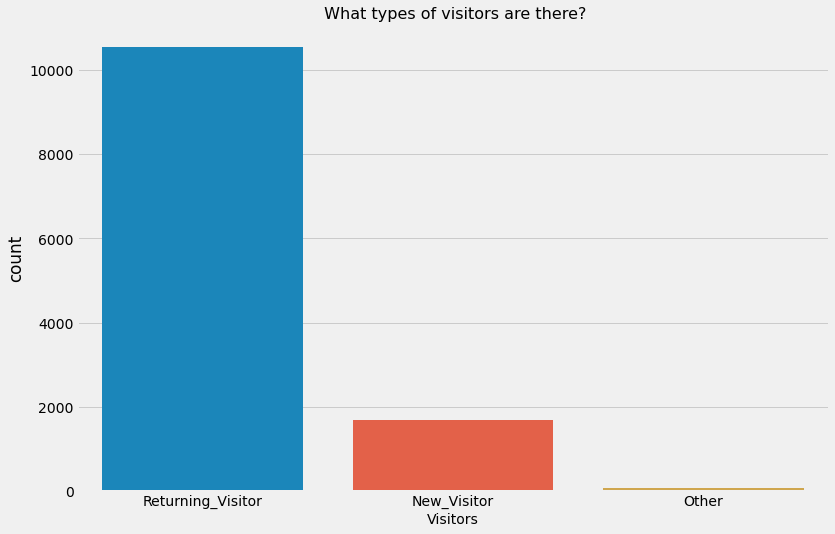

In [10]:
sns.countplot(x='VisitorType', data=df)
plt.title(' What types of visitors are there?', fontsize=16)
plt.xlabel('Visitors', fontsize=14)
plt.show()

In [11]:
df['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

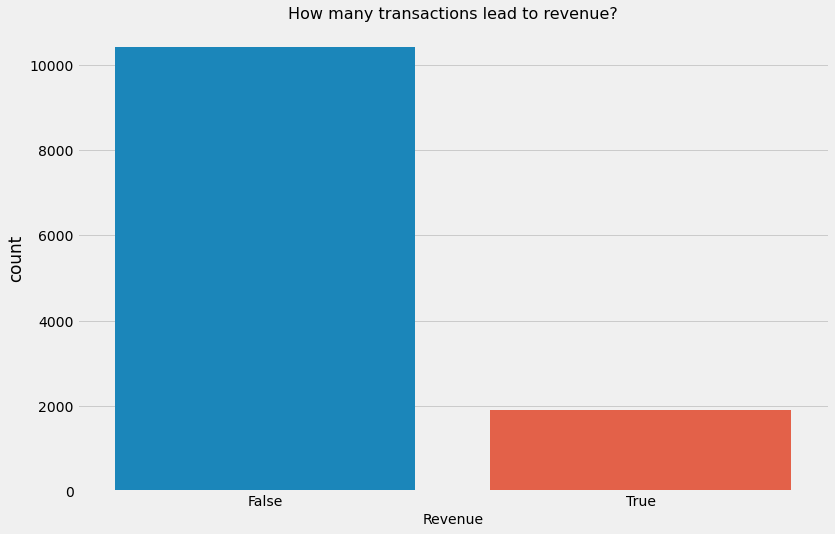

In [12]:
sns.countplot(x='Revenue', data=df)
plt.title('How many transactions lead to revenue?', fontsize=16)
plt.xlabel('Revenue', fontsize=14)
plt.show()

In [13]:
df['Month'].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

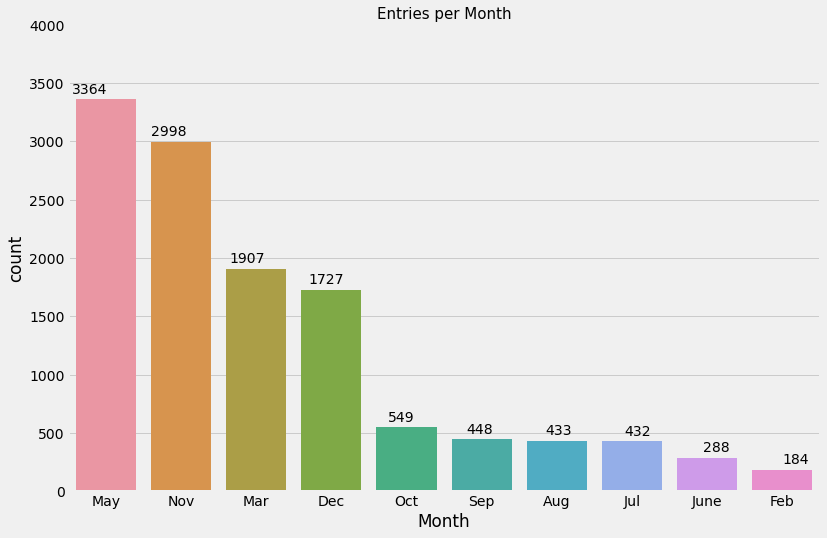

In [14]:
monthly = df['Month'].value_counts()

sns.countplot(df['Month'], order=monthly.index)
plt.title('Entries per Month', fontsize=15)
xval = -.45
plt.ylim(0,4000)

for index, value in monthly.items():
    plt.text(x=xval, y=value+50, s=str(value))
    xval += 1.05

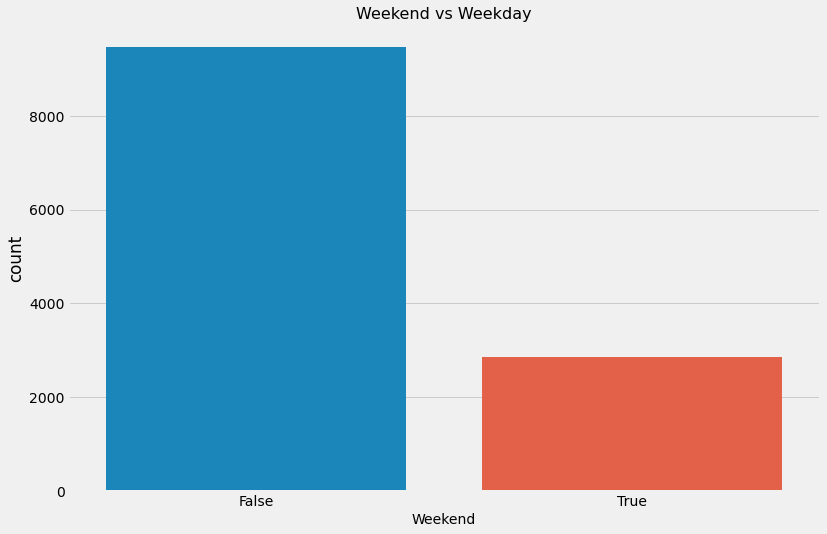

In [15]:
sns.countplot(x='Weekend', data=df)
plt.title('Weekend vs Weekday', fontsize=16)
plt.xlabel('Weekend', fontsize=14)
plt.show()

#### Univariate analysis - page type patterns

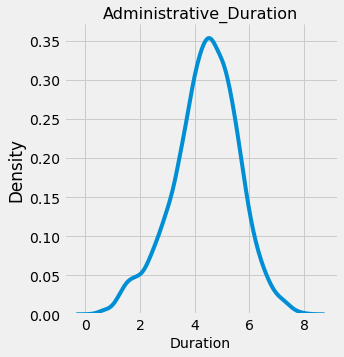

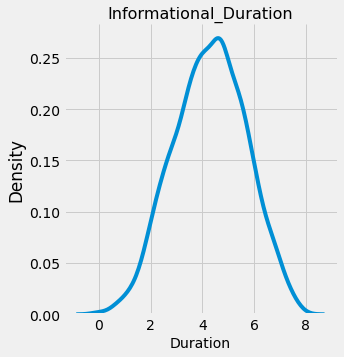

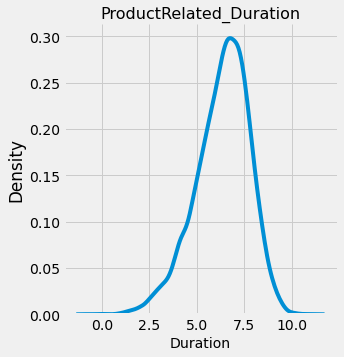

In [16]:
# How much time do visitors spend on the website?
for col in df.columns:
    if 'Duration' in col:
        sns.displot(np.log(df[col]), kind="kde",)
        plt.title(col, fontsize=16)
        plt.xlabel('Duration', fontsize=14)
        plt.show()

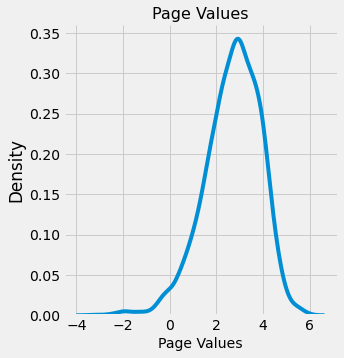

In [17]:
# How are page values distributed?
sns.displot(np.log(df['PageValues']), kind="kde",)
plt.title('Page Values', fontsize=16)
plt.xlabel('Page Values', fontsize=14)
plt.show()


In this first pass of univariate analysis, we see that most people are returning visitors who visit Monday through Friday. The overwhelming majority of transactions do not lead to revenue, and the most popular times of year are May and November, with a sharp drop off during the summer months.

*Need PDF information and what that means

#### Bivariate analysis

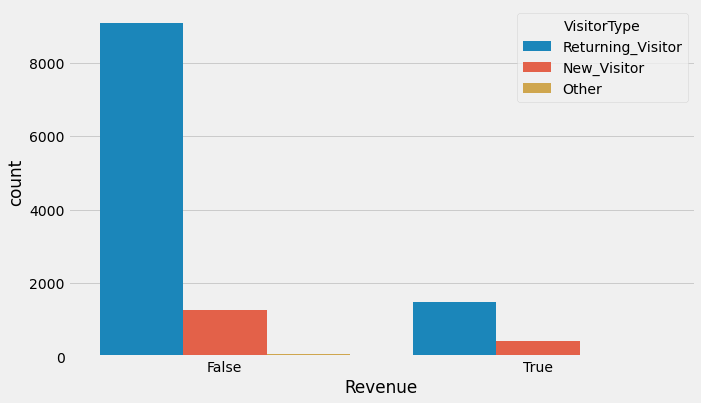

In [18]:
# plot Revenue based on visitor type
plt.figure(figsize=(10, 6))
sns.countplot(x='Revenue', hue='VisitorType', data=df)
plt.show()

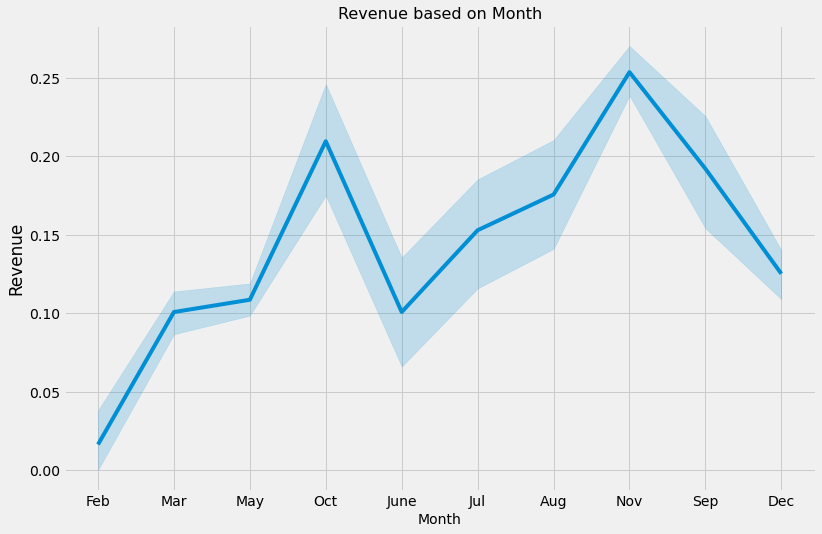

In [19]:
# Create a line plot of revenue based on month
sns.lineplot(x='Month', y='Revenue', data=df)
plt.title('Revenue based on Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.show()

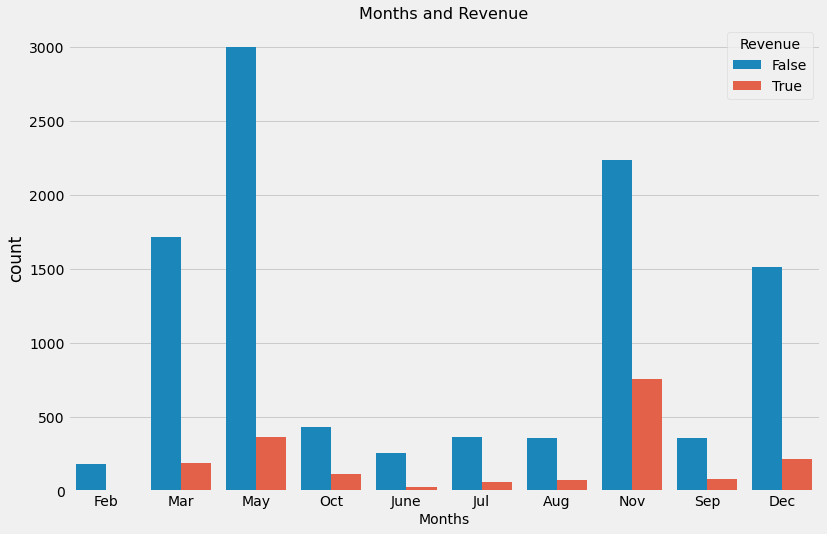

In [20]:
# Which months have the most revenue?
sns.countplot(x='Month', data=df, hue='Revenue')
plt.title('Months and Revenue', fontsize=16)
plt.xlabel('Months', fontsize=14)
plt.show()

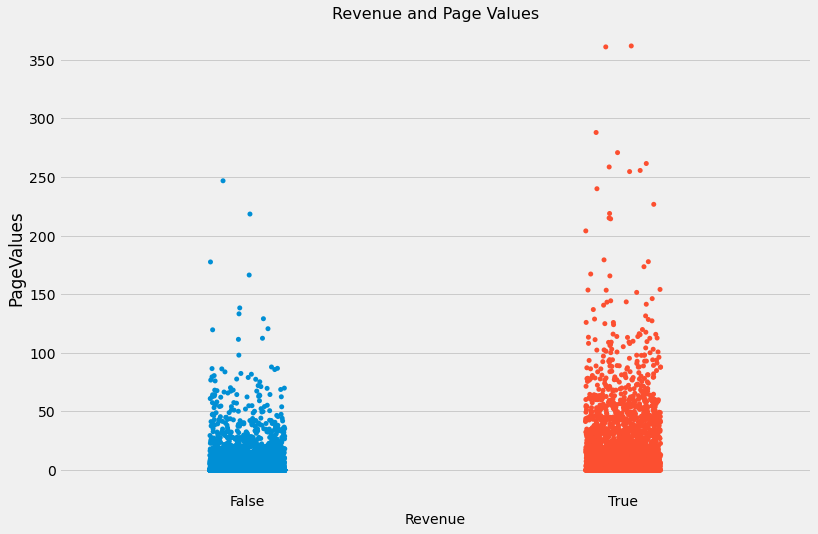

In [22]:
# What is the relationship between revenue and page values?
sns.stripplot(x='Revenue', y='PageValues', data=df)
plt.title('Revenue and Page Values', fontsize=16)
plt.xlabel('Revenue', fontsize=14)
plt.show()

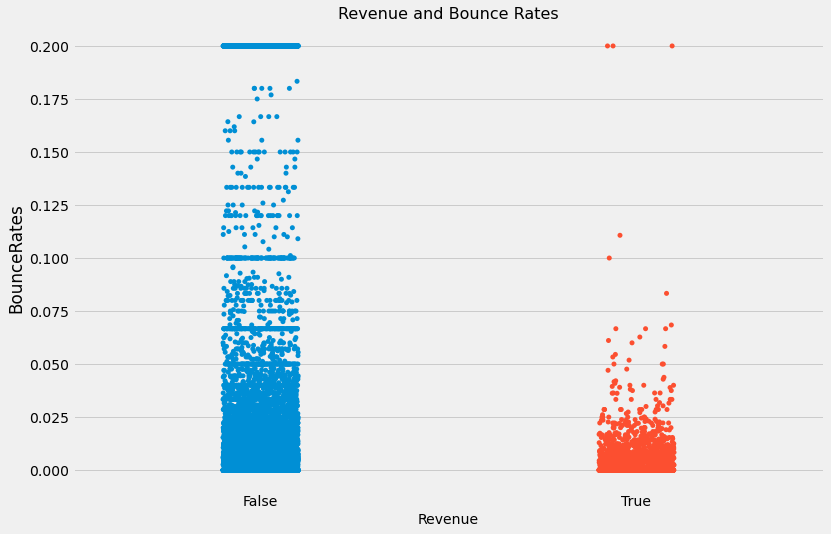

In [24]:
# What is the relationship between revenue and bounce rates?
sns.stripplot(x='Revenue', y='BounceRates', data=df)
plt.title('Revenue and Bounce Rates', fontsize=16)
plt.xlabel('Revenue', fontsize=14)
plt.show()